In [2]:
# Libraries
from ismn.interface import ISMN_Interface
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# Either a .zip file or one folder that contains all networks, here we read from .zip
data_path = "../data/raw/Data_separate_files_header_20170101_20171231_10665_biO9_20231025.zip"
ismn_data = ISMN_Interface(data_path, parallel=True)

Processing metadata for all ismn stations into folder ..\data\raw\Data_separate_files_header_20170101_20171231_10665_biO9_20231025.zip.
This may take a few minutes, but is only done once...



Files Processed: 100%|██████████| 1629/1629 [03:52<00:00,  6.99it/s]


Metadata generation finished after 234 Seconds.
Metadata and Log stored in ..\data\raw\python_metadata
Found existing ismn metadata in ..\data\raw\python_metadata\Data_separate_files_header_20170101_20171231_10665_biO9_20231025.csv.


In [13]:
ismn_data

ismn.base.IsmnRoot Zip at ..\data\raw\Data_separate_files_header_20170101_20171231_10665_biO9_20231025.zip
with Networks[Stations]:
------------------------
  AMMA-CATCH: ['Banizoumbou', 'Belefoungou-Mid', 'Belefoungou-Top', 'Nalohou-Mid', 'Nalohou-Top', 'Tondikiboro', 'Wankama'],
  ARM: ['Anthony', 'Ashton', 'Byron', 'Lamont-CF1', 'MapleCity', 'Marshall', 'Medford', 'Morrison', 'Newkirk', 'Omega', 'Pawhuska', 'Ringwood', 'Tryon', 'Tyro', 'Waukomis'],
  BIEBRZA_S-1: ['grassland-soil-1', 'grassland-soil-2', 'grassland-soil-3', 'grassland-soil-4', 'grassland-soil-5', 'grassland-soil-6', 'grassland-soil-7', 'grassland-soil-8', 'grassland-soil-9', 'marshland-soil-11', 'marshland-soil-12', 'marshland-soil-13', 'marshland-soil-14', 'marshland-soil-15', 'marshland-soil-16', 'marshland-soil-17', 'marshland-soil-18', 'marshland-soil-19'],
  COSMOS: ['ARM-1', 'Barrow-ARM', 'BaynesfieldProbe1', 'Bondville', 'Bushland', 'CCPasture', 'CPTECINPE', 'CoastalSageUCI', 'Daly', 'DanielForest', 'DesertCha

In [29]:
network = "FMI"
station = "SOD130"
sensor = "CS655-B_soil_temperature_0.050000_0.050000"

In [30]:
ismn_data[network][station]

Station 'SOD130' with Sensors: ['CS655-B_soil_moisture_0.050000_0.050000', 'CS655-B_soil_temperature_0.050000_0.050000', 'CS655-B_soil_moisture_0.100000_0.100000', 'CS655-B_soil_temperature_0.100000_0.100000', 'CS655-A_soil_moisture_0.050000_0.050000', 'CS655-A_soil_temperature_0.050000_0.050000', 'CS655-A_soil_moisture_0.100000_0.100000', 'CS655-A_soil_temperature_0.100000_0.100000', 'CS655-A_soil_moisture_0.200000_0.200000', 'CS655-A_soil_temperature_0.200000_0.200000', 'CS655-A_soil_moisture_0.400000_0.400000', 'CS655-A_soil_temperature_0.400000_0.400000', 'CS655-A_soil_moisture_0.800000_0.800000', 'CS655-A_soil_temperature_0.800000_0.800000']

variable        key       
clay_fraction   val                           4.0
                depth_from                    0.0
                depth_to                      0.3
climate_KG      val                           Dfc
climate_insitu  val                       unknown
elevation       val                         152.0
instrument      val                       CS655-B
                depth_from                   0.05
                depth_to                     0.05
latitude        val                      67.25729
lc_2000         val                            70
lc_2005         val                            70
lc_2010         val                            70
lc_insitu       val                       unknown
longitude       val                      26.74857
network         val                           FMI
organic_carbon  val                          2.18
                depth_from                    0.0
                depth_to                      0.3
sand_fraction   val    

Text(0.5, 1.0, 'Network: FMI, station: SOD130')

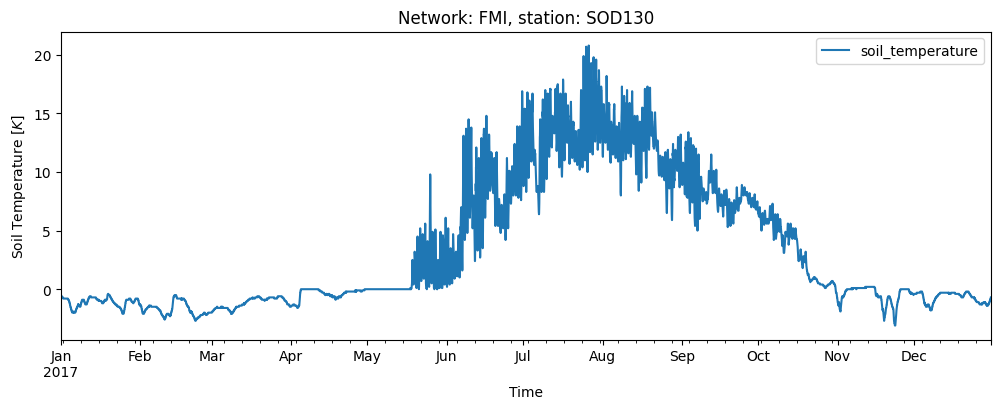

In [33]:

timeseries = ismn_data[network][station][sensor]
print(timeseries.metadata.to_pd())
ax = timeseries.data.plot(figsize=(12,4))
ax.set_xlabel("Time")
ax.set_ylabel("Soil Temperature [$K$]")
plt.title (f"Network: {network}, station: {station}")

In [34]:
# We can filter the data to pick a specific variable

ids = ismn_data.get_dataset_ids(variable='soil_temperature',
                                max_depth=1,
                                filter_meta_dict={'lc_2005': 130, 'climate_KG': 'Csb'})
ids

[6333,
 6335,
 6337,
 6339,
 8116,
 8118,
 8120,
 8333,
 8335,
 8337,
 8339,
 10604,
 10605,
 10606,
 10607,
 10608]

In [35]:
conditions = (ismn_data.metadata['variable'].val == 'soil_temperature') & \
             (ismn_data.metadata['instrument'].depth_to <= 1) & \
             (ismn_data.metadata['lc_2005'].val == 130) & \
             (ismn_data.metadata['climate_KG'].val == 'Csb')

ismn_data.metadata[conditions].index.to_list()

[6333,
 6335,
 6337,
 6339,
 8116,
 8118,
 8120,
 8333,
 8335,
 8337,
 8339,
 10604,
 10605,
 10606,
 10607,
 10608]

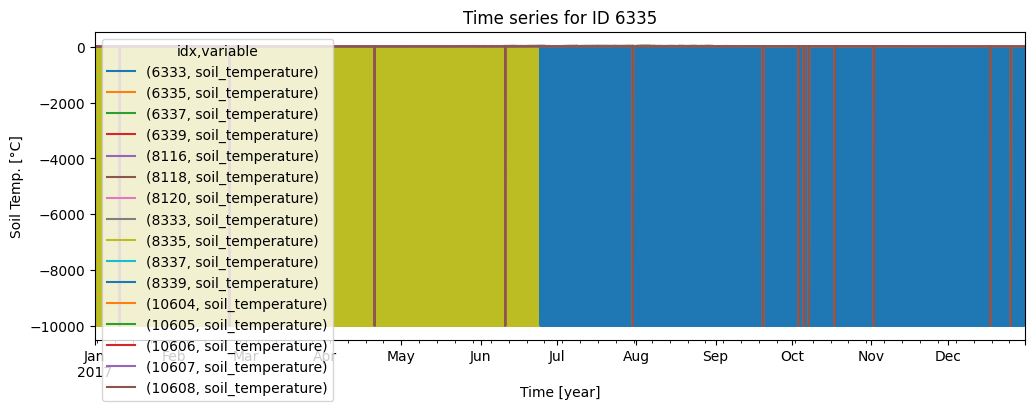

In [36]:
ts, meta = ismn_data.read(ids, return_meta=True)
ax = ts.plot(figsize=(12,4), title=f'Time series for ID {ids[1]}', xlabel="Time [year]", ylabel="Soil Temp. [°C]")

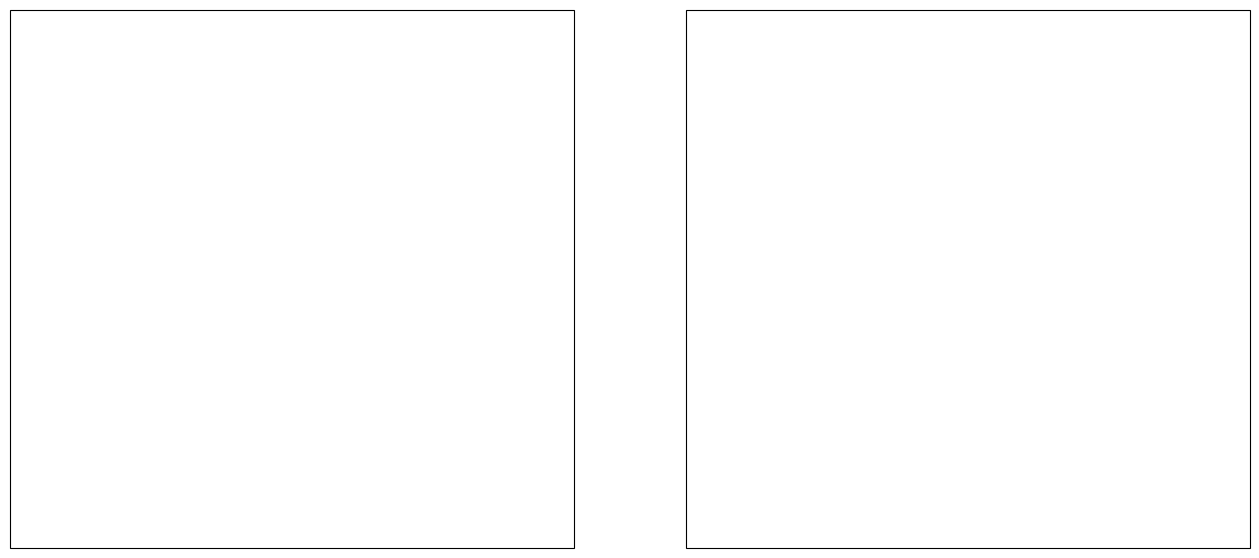

In [38]:
# We can even plot station locations 
import cartopy.crs as ccrs
#plot available station on a map
fig, axs = plt.subplots(1, 2, figsize=(16,10), subplot_kw={'projection': ccrs.Robinson()})
ismn_data.plot_station_locations('soil_moisture', min_depth=0., max_depth=0.1, ax=axs[0], markersize=5, text_scalefactor=2)
ismn_data.plot_station_locations('soil_temperature', min_depth=0.5, ax=axs[1], markersize=5, text_scalefactor=3)
axs[0].set_extent([-10, 35, 34, 71])
axs[1].set_extent([-10, 35, 34, 71])
plt.show()